In [1]:
import numpy as np
c1 = [2, 3, 6]
c2 = [1, 2, 5]

print(np.convolve(c1, c2))
print(np.convolve(c1, c2, mode='full'))
print(np.convolve(c1, c2, mode='same'))
print(np.convolve(c1, c2, mode='valid'))

[ 2  7 22 27 30]
[ 2  7 22 27 30]
[ 7 22 27]
[22]


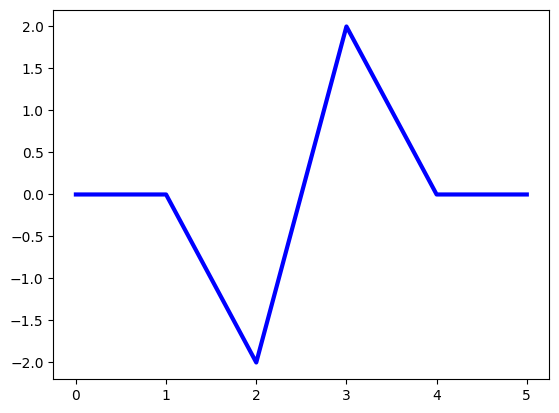

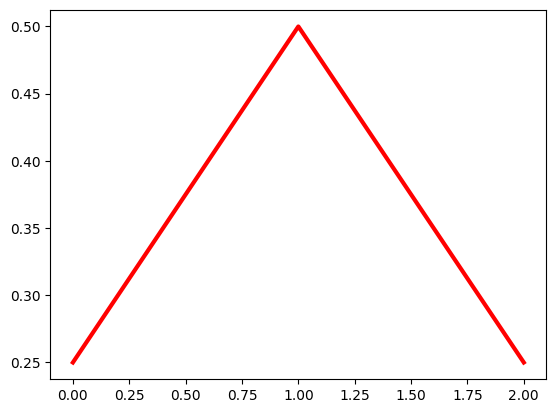

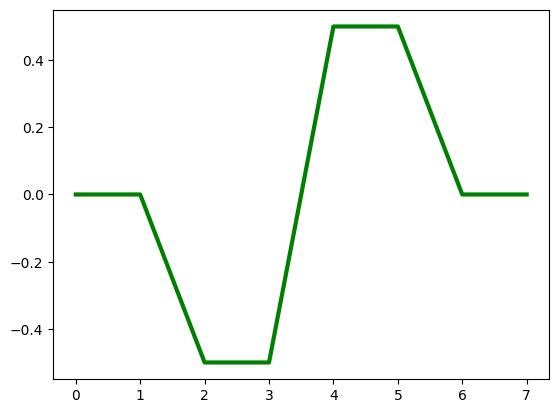

In [3]:
import matplotlib.pyplot as plt
c1 = [0, 0, -2, 2, 0, 0]
c2 = [0.25, 0.5, 0.25]

plt.figure()
plt.plot(c1, 'b', linewidth=3)
plt.figure()
plt.plot(c2, 'r', linewidth=3)
plt.figure()
plt.plot(np.convolve(c1, c2), 'g', linewidth=3)


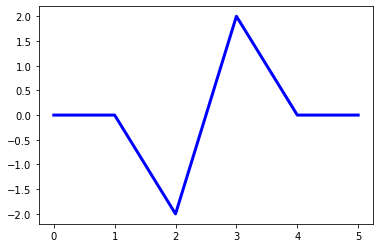

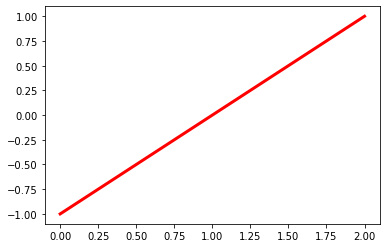

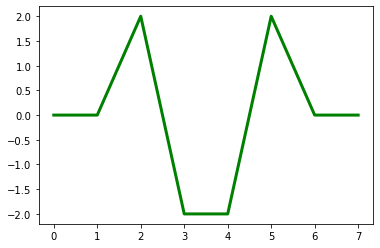

In [13]:
c1 = [0, 0, -2, 2, 0, 0]
c2 = [-1.0, 0.0, 1.0]

plt.figure()
plt.plot(c1, 'b', linewidth=3)
plt.figure()
plt.plot(c2, 'r', linewidth=3)
plt.figure()
plt.plot(np.convolve(c1, c2), 'g', linewidth=3)

(288288,)


C:\Users\kleme\AppData\Local\Temp\ipykernel_17840\1596899809.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, data = wavfile.read("guitar_drum.wav")


Text(0, 0.5, 'Amplitude')

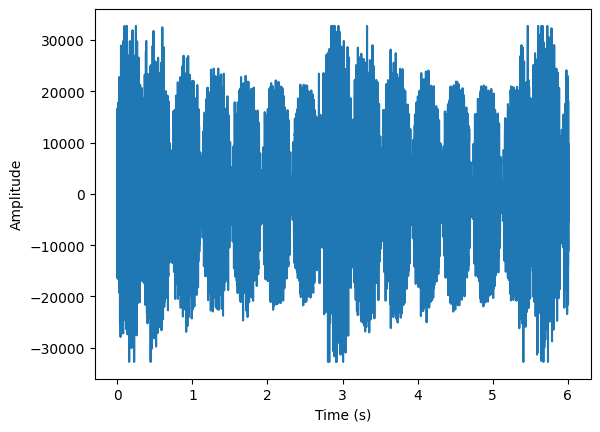

In [4]:
from scipy.io import wavfile
from scipy import signal
import scipy.io.wavfile as wav

sampling_rate, data = wavfile.read("guitar_drum.wav")
data = data[:, 0]
time = np.arange(0, len(data) / sampling_rate, 1 / sampling_rate)
print(time.shape)
maxData = np.max(data)

plt.plot(time, data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

In [5]:
import scipy.io.wavfile as wav
# write audio data to single channel wav file
wav.write("outputData.wav", sampling_rate, data.astype(np.int16))

Text(0.5, 1.0, 'Accelerometer Data')

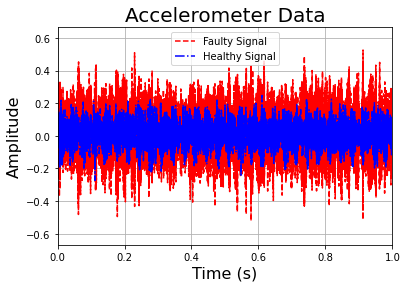

In [45]:
import scipy.io
fs = 12000
faulty = scipy.io.loadmat('./12k_Drive_End_B007_0_118.mat')
healthy = scipy.io.loadmat('./normal_0_97.mat')

dataFaulty = faulty['X118_DE_time']
dataHealthy = healthy['X097_DE_time']

timeFaulty = np.linspace(0, dataFaulty.size/fs, dataFaulty.size)
timeHealthy = np.linspace(0, dataHealthy.size/fs, dataHealthy.size)

plt.figure()
plt.grid()
plt.plot(timeFaulty, dataFaulty, 'r--', label='Faulty Signal')
plt.plot(timeHealthy, dataHealthy, 'b-.', label='Healthy Signal')
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.xlim(0, 1)
plt.legend(loc='upper center')
plt.title('Accelerometer Data', fontsize=20)

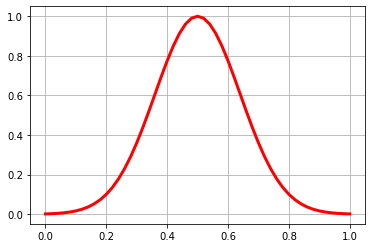

In [46]:
c2 = signal.windows.gaussian(51, std=7)
x = np.linspace(0, 1, 51)
plt.grid()
plt.plot(x, c2, 'r', linewidth=3)

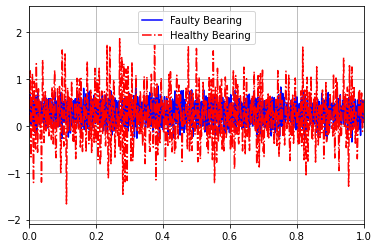

In [47]:
from scipy import signal


faultyFiltered = signal.fftconvolve(dataFaulty[:, 0], c2, mode='same')
healthyFiltered = signal.fftconvolve(dataHealthy[:, 0], c2, mode='same')

plt.figure()
plt.grid()
plt.plot(timeFaulty, faultyFiltered, 'b', label='Faulty Bearing')
plt.plot(timeHealthy, healthyFiltered, 'r-.', label='Healthy Bearing')
plt.xlim(0, 1)
plt.legend(loc='upper center')

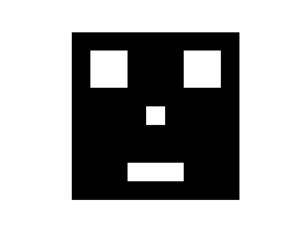

In [48]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

image = Image.open('grayscale_image.png')
# Convert the PIL Image object to a NumPy array 
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')


# Create a 2D matrix of random grayscale values
matrix = np.zeros((9, 9), dtype='uint8')

# Fill the matrix with random grayscale values
for i in range(3):
    matrix[7, i+3] = 1

matrix[4, 4] = 1

for i in range(2):
    for j in range(2):
        matrix[i+1, j+1] = 1
        matrix[i+1, j+6] = 1

(-0.5, 8.5, 8.5, -0.5)

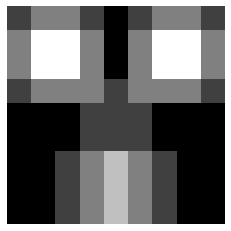

In [49]:
from scipy.signal import convolve2d
import numpy as np

filter = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) # eye filter
convolvedMatrix = convolve2d(matrix, filter, mode='same')
convolvedMatrix = convolvedMatrix/np.max(convolvedMatrix)
plt.imshow(convolvedMatrix, cmap='gray', vmin=0, vmax=1)
plt.axis('off')

(-0.5, 8.5, 8.5, -0.5)

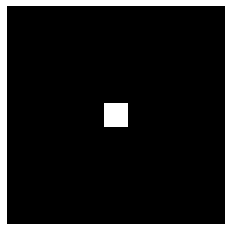

In [50]:
filter = np.array([[-1, 1, -1]])    # nose filter
convolvedMatrix = convolve2d(matrix, filter, mode='same')
convolvedMatrix = convolvedMatrix/np.max(convolvedMatrix)
plt.imshow(convolvedMatrix, cmap='gray', vmin=0, vmax=1)
plt.axis('off')

(-0.5, 8.5, 8.5, -0.5)

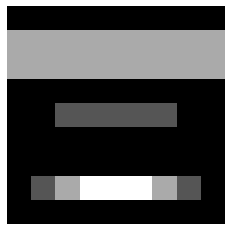

In [51]:
filter = np.array([[1, 1, 1, 1, 1]])  # mouth filter
convolvedMatrix = convolve2d(matrix, filter, mode='same')
convolvedMatrix = convolvedMatrix/np.max(convolvedMatrix)
plt.imshow(convolvedMatrix, cmap='gray', vmin=0, vmax=1)
plt.axis('off')